**Importar o DATASET IRIS.CSV**

In [ ]:
!pip install basedosdados

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import basedosdados as bd
import re

In [ ]:
query = """
    SELECT
    dados.id as id,
    dados.title as title,
    dados.link as link,
    dados.year as year,
    dados.duration as duration,
    dados.rating_mpa as rating_mpa,
    dados.rating_imdb as rating_imdb,
    dados.vote as vote,
    dados.budget as budget,
    dados.gross_world_wide as gross_world_wide,
    dados.gross_us_canada as gross_us_canada,
    dados.gross_opening_weekend as gross_opening_weekend,
    dados.director as director,
    dados.writer as writer,
    dados.star as star,
    dados.genre as genre,
    dados.country_origin as country_origin,
    dados.filming_location as filming_location,
    dados.production_company as production_company,
    dados.language as language,
    dados.win as win,
    dados.nomination as nomination,
    dados.oscar as oscar
FROM `basedosdados.world_imdb_movies.top_movies_per_year` AS dados
"""

df = bd.read_sql(query, billing_project_id="e-health-416317")
df.head(10)

Downloading: 100%|██████████|


,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,writer,star,genre,country_origin,filming_location,production_company,language,win,nomination,oscar
0,tt0073470,Strip Nude for Your Killer,https://www.imdb.com/title/tt0073470,1975,1h 38m,Not Rated,5.6,33000,NaN,NaN,...,"Andrea Bianchi, Massimo Felisatti","Edwige Fenech, Nino Castelnuovo, Femi Benussi","Erotic Thriller, Giallo, Slasher Horror, Horro...",Italy,"Milan, Lombardia, Italy",FRAL Cinematografica,Italian,0,0,0
1,tt0072764,Carry on Behind,https://www.imdb.com/title/tt0072764,1975,1h 30m,Not Rated,5.6,31000,NaN,NaN,...,Dave Freeman,"Elke Sommer, Kenneth Williams, Bernard Bresslaw","Parody, Slapstick, Comedy",United Kingdom,"Bad Godesberg Way, Maidenhead, Berkshire, Engl...","The Rank Organisation, Peter Rogers Productions",English,0,0,0
2,tt0131526,"So Young, So Lovely, So Vicious...",https://www.imdb.com/title/tt0131526,1975,1h 30m,None,4.9,487,NaN,NaN,...,"Silvio Amadio, Roberto Natale","Gloria Guida, Dagmar Lassander, Fred Robsahm","Drama, Mystery, Thriller",Italy,"Sardinia, Italy",Domiziana Internazionale Cinematografica,Italian,0,0,0
3,tt0073335,Mahogany,https://www.imdb.com/title/tt0073335,1975,1h 49m,PG,6.1,23000,NaN,NaN,...,"John Byrum, Toni Amber","Diana Ross, Billy Dee Williams, Anthony Perkins","Drama, Romance",United States,Marshall Field Co Department Store 111 N Sta...,"Motown Productions, Nikor Productions, Paramou...","English, Italian",0,0,1
4,tt0073006,Foreplay,https://www.imdb.com/title/tt0073006,1975,1h 15m,R,4.0,185,NaN,NaN,...,"Dan Greenburg, Jack Richardson, Bruce Jay Frie...","Irwin Corey, Pat Paulsen, Deborah Loomis","Parody, Satire, Sketch Comedy, Comedy",United States,None,SynFrank Enterprises,English,0,0,0
5,tt0073343,The Man from Hong Kong,https://www.imdb.com/title/tt0073343,1975,1h 46m,R,6.6,2000,535000.0,684.0,...,Brian TrenchardSmith,"Jimmy Wang Yu, George Lazenby, Hugh KeaysByrne","Action, Adventure, Crime, Drama","Australia, Hong Kong","Stanwell Park, New South Wales, Australia","Golden Harvest Company, The Movie Company Pty ...","English, Mandarin",0,0,0
6,tt0073461,Night of the Seagulls,https://www.imdb.com/title/tt0073461,1975,1h 29m,R,5.7,23000,NaN,NaN,...,"HP Lovecraft, Amando de Ossorio","Vctor Petit, Mara Kosty, Sandra Mozarowsky",Horror,Spain,"Tossa de Mar, Girona, Catalonia, Spain","Ancla Century Films, Profilmes, Prez Pareja, M...",Spanish,0,0,0
7,tt0073482,The Olsen Gang on the Track,https://www.imdb.com/title/tt0073482,1975,1h 45m,Not Rated,7.2,22000,NaN,NaN,...,"Erik Balling, Henning Bahs","Ove Sproge, Morten Grunwald, Poul Bundgaard","Comedy, Crime, Family",Denmark,"Asta Nielsen Strdet, Valby, Copenhagen, Denmark",Nordisk Film,Danish,0,0,0
8,tt0073208,A Woman Called Sada Abe,https://www.imdb.com/title/tt0073208,1975,1h 25m,None,6.1,626,NaN,NaN,...,Akio Ido,"Junko Miyashita, Eimei Esumi, Gensh Hanayagi","Biography, Drama",Japan,None,Nikkatsu,Japanese,0,0,0
9,tt0360231,Zinda Dil,https://www.imdb.com/title/tt0360231,1975,2h 5m,None,6.9,69,NaN,NaN,...,KD Shorey,"Rishi Kapoor, Neetu Singh, Zaheera","Action, Romance",India,None,NH Studioz,Hindi,0,0,0


In [ ]:
def extract_duration_minutes(duration_str):
    if pd.isna(duration_str):
        return 0.0

    hours = 0
    minutes = 0

    hour_match = re.search(r'(\d+)h', str(duration_str))
    if hour_match:
        hours = int(hour_match.group(1))

    minute_match = re.search(r'(\d+)m', str(duration_str))
    if minute_match:
        minutes = int(minute_match.group(1))

    return hours * 60 + minutes

df['duration_minutes'] = df['duration'].apply(extract_duration_minutes)

print("Exemplos de conversão de duração:")
df[['duration', 'duration_minutes']].head()

Exemplos de conversão de duração:


,duration,duration_minutes
0,1h 38m,98.0
1,1h 30m,90.0
2,1h 30m,90.0
3,1h 49m,109.0
4,1h 15m,75.0


In [ ]:
df.dropna(subset=['budget', 'gross_world_wide'], inplace=True)

Distribuição de filmes por categoria de avaliação:
rating_category
médio    5324
baixo    3131
alto      951
Name: count, dtype: int64


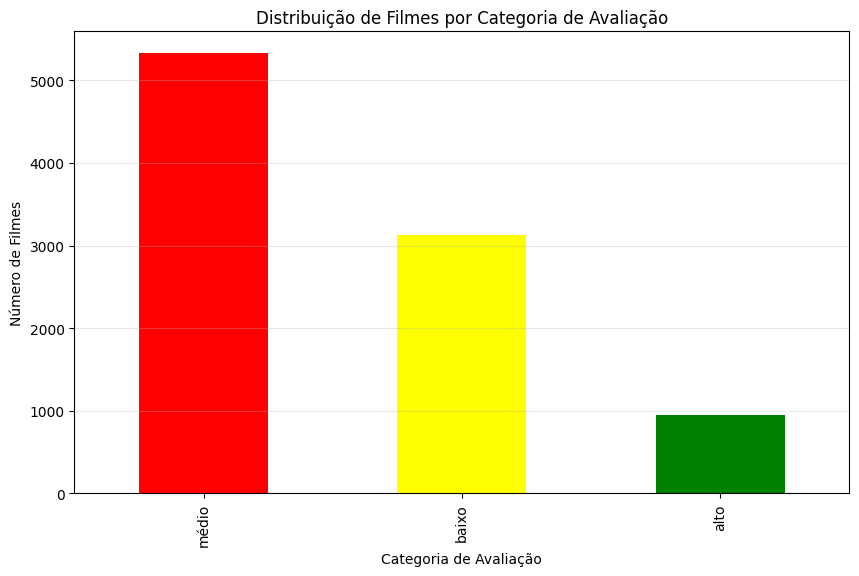

In [ ]:
df['rating_category'] = pd.cut(df['rating_imdb'],
                              bins=[0, 6.0, 7.5, 10.0],
                              labels=['baixo', 'médio', 'alto'])

rating_counts = df['rating_category'].value_counts()
print("Distribuição de filmes por categoria de avaliação:")
print(rating_counts)

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color=['red', 'yellow', 'green'])
plt.title('Distribuição de Filmes por Categoria de Avaliação')
plt.xlabel('Categoria de Avaliação')
plt.ylabel('Número de Filmes')
plt.grid(axis='y', alpha=0.3)
plt.show()

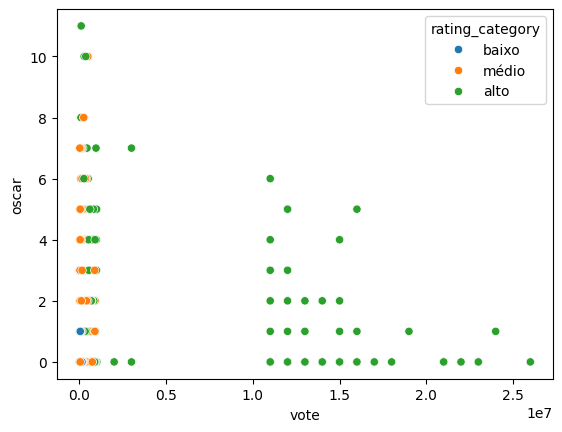

In [ ]:
sns.scatterplot(x='vote', y='oscar', data=df,hue='rating_category')
plt.show()


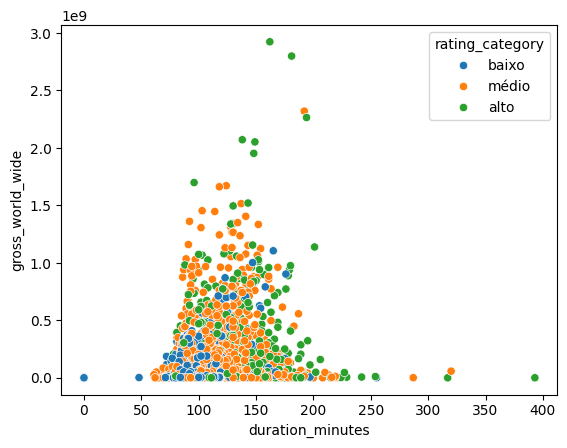

In [ ]:
sns.scatterplot(x='duration_minutes', y='gross_world_wide', data=df,hue='rating_category')
plt.show()

**Gráficos de relações entre os atributos e as amostras.**

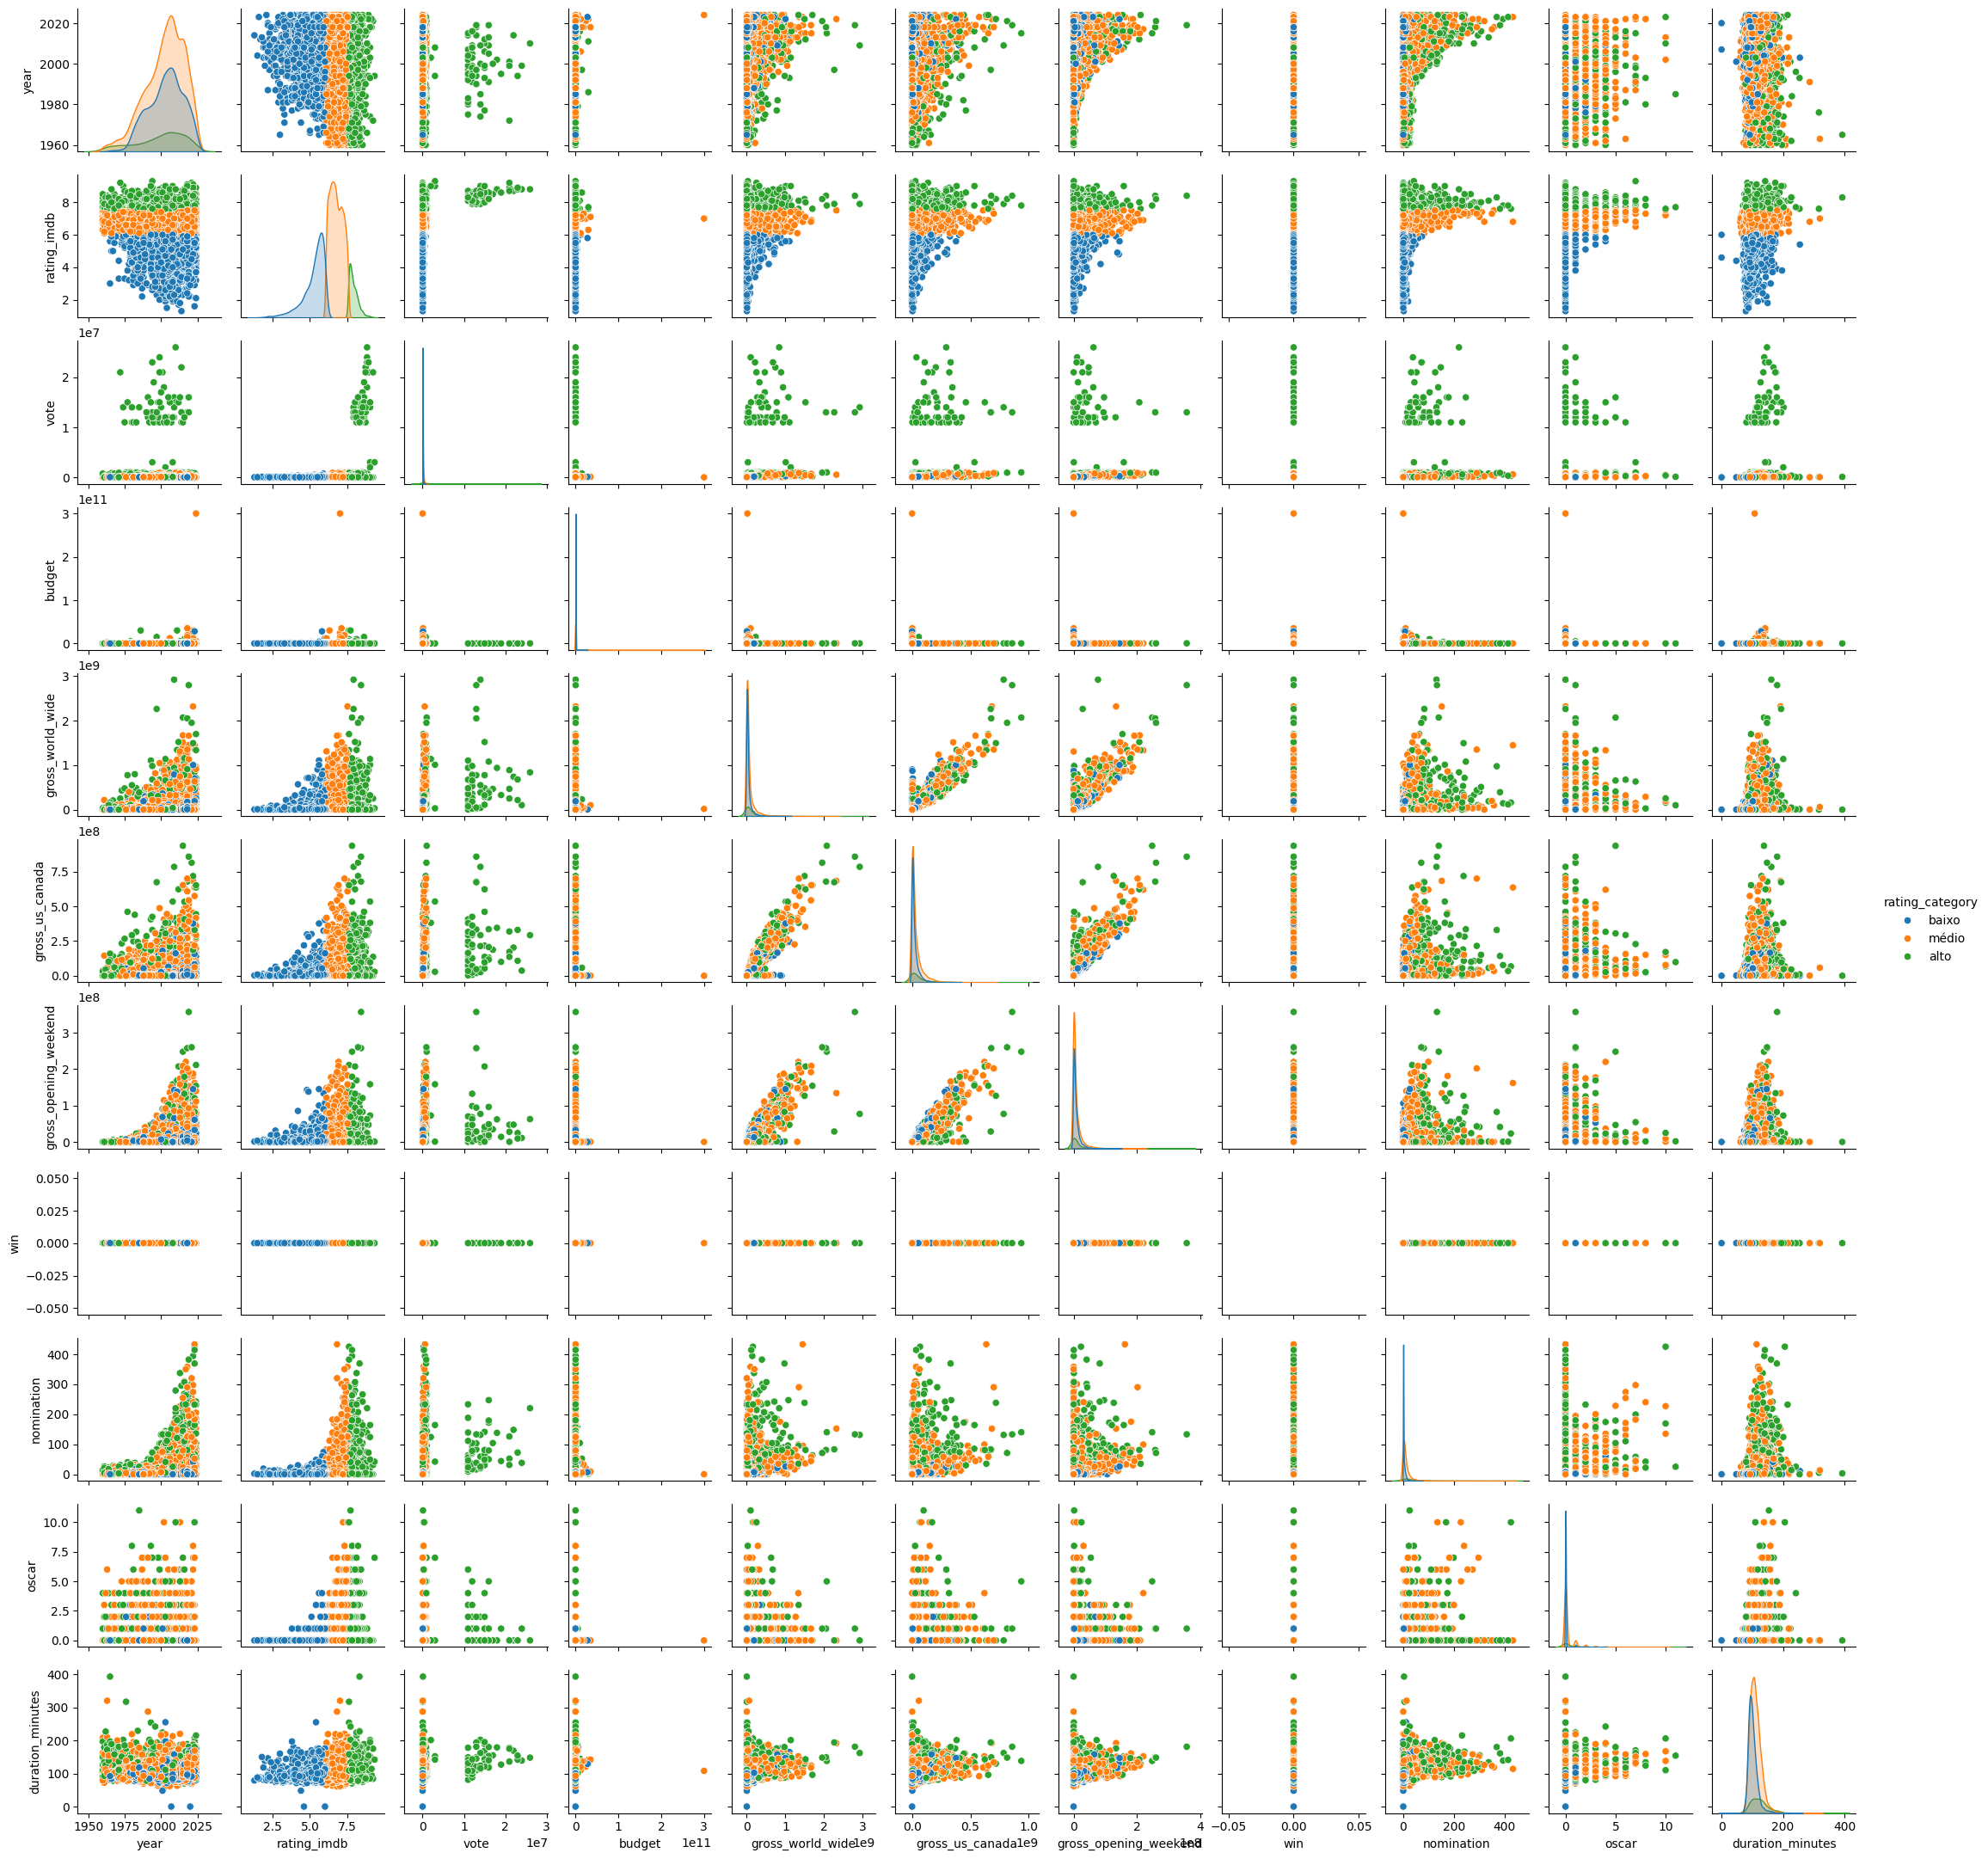

In [ ]:
sns.pairplot(df, hue='rating_category',height = 2.0)
plt.show()

**Preparação dos dados para Iniciar o KMEAS - Retirada dos rótulos**

In [ ]:
#Dados preprocessamento
#features (X)
#target (y)
#remover a coluna Species e copiar para X
X = df.drop('rating_category', axis=1)
#copiar a coluna Species para y
y = df['rating_category']

#atribuindo nomes ao vetor
feature_cols =  ['vote', 'budget', 'gross_world_wide', 'win', 'nomination', 'oscar', 'duration_minutes']

X = df[feature_cols]
X.head()

,vote,budget,gross_world_wide,win,nomination,oscar,duration_minutes
5,2000,535000.0,684.0,0,0,0,106.0
12,22000,3200000.0,33500000.0,0,0,0,112.0
14,16000,300000.0,3456.0,0,0,0,100.0
63,164000,69000000.0,116471580.0,0,0,0,105.0
64,252000,45000000.0,198087212.0,0,70,1,114.0


In [ ]:
#número de instâncias
X.shape

(9406, 7)

**Inicialização do Algoritmo KMEAS - Fase de TEINAMENTO**


*   Vetor com os 3 Cluters definidos (0,1,2)


In [ ]:
#Kmeans Clustering
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)

y_kmeans = model.fit_predict(X)
y_kmeans


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

**Inclusão da coluna "CLuster" no DATABASE IRIS**

In [ ]:
df['cluster'] = y_kmeans
df.sample(8)

,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,country_origin,filming_location,production_company,language,win,nomination,oscar,rating_category,duration_minutes,cluster
1900,tt0110944,Rapa Nui,https://www.imdb.com/title/tt0110944,1994,1h 47m,R,6.4,55000,20000000.0,305070.0,...,United States,"Easter Island, Chile","Majestic Films International, Newcomm, RCS",English,0,0,0,médio,107.0,0
5043,tt5113044,Minions: The Rise of Gru,https://www.imdb.com/title/tt5113044,2022,1h 27m,PG,6.5,95000,80000000.0,940203765.0,...,"United States, France","New York City, New York, USA","Universal Pictures, Illumination Entertainment","English, Vietnamese",0,18,0,médio,87.0,0
14297,tt1340107,In a Better World,https://www.imdb.com/title/tt1340107,2010,1h 58m,R,7.6,42000,5500000.0,13004504.0,...,"Denmark, Sweden, Belgium, Germany",Kenya,"Danmarks Radio DR, Det Danske Filminstitut, Fi...","Danish, Swedish, English, Arabic",0,24,0,alto,118.0,0
2291,tt0454945,She's the Man,https://www.imdb.com/title/tt0454945,2006,1h 45m,PG-13,6.4,181000,20000000.0,57194667.0,...,"United States, Canada","British Columbia, Canada","Dreamworks Pictures, Lakeshore Entertainment, ...","English, French",0,5,0,médio,105.0,0
12956,tt0078326,Straight Time,https://www.imdb.com/title/tt0078326,1978,1h 54m,R,7.4,11000,4000000.0,9900000.0,...,United States,"E Ave G 198th St E, Lancaster, California, USA","First Artists, Sweetwall","English, Spanish, Cantonese",0,0,0,médio,114.0,0
30256,tt0107529,Matinee,https://www.imdb.com/title/tt0107529,1993,1h 39m,PG,6.9,13000,13000000.0,9532895.0,...,United States,"Key West, Florida Keys, Florida, USA","Universal Pictures, Renfield Productions, Falc...",English,0,0,0,médio,99.0,0
18977,tt0486822,Disturbia,https://www.imdb.com/title/tt0486822,2007,1h 45m,PG-13,6.8,263000,20000000.0,118114220.0,...,United States,"6221 Painter Ave, Whittier, California, USA","Dreamworks Pictures, Cold Spring Pictures, The...","English, Spanish",0,7,0,médio,105.0,0
14154,tt5636668,Battle of Memories,https://www.imdb.com/title/tt5636668,2017,1h 59m,None,6.4,13000,22000000.0,43892362.0,...,China,"Bangkok, Thailand","Golden Cicada Films, Shanghai Universaljoy Pic...",Mandarin,0,7,0,médio,119.0,0


In [ ]:
#todos os cluster com o código = 0 ou Versicolor
df[df.cluster == 0].head()


,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,country_origin,filming_location,production_company,language,win,nomination,oscar,rating_category,duration_minutes,cluster
5,tt0073343,The Man from Hong Kong,https://www.imdb.com/title/tt0073343,1975,1h 46m,R,6.6,2000,535000.0,684.0,...,"Australia, Hong Kong","Stanwell Park, New South Wales, Australia","Golden Harvest Company, The Movie Company Pty ...","English, Mandarin",0,0,0,médio,106.0,0
12,tt0076138,Heroes,https://www.imdb.com/title/tt0076138,1977,1h 52m,PG,6.0,22000,3200000.0,33500000.0,...,United States,"Times Square Army Recruiting Station, Manhatta...","David Foster Productions, Universal Pictures","English, Spanish",0,0,0,baixo,112.0,0
14,tt0076706,Short Eyes,https://www.imdb.com/title/tt0076706,1977,1h 40m,R,7.0,16000,300000.0,3456.0,...,United States,"Manhattan, New York City, New York, USA",None,English,0,0,0,médio,100.0,0
63,tt1611224,Abraham Lincoln: Vampire Hunter,https://www.imdb.com/title/tt1611224,2012,1h 45m,R,5.9,164000,69000000.0,116471580.0,...,"United States, Russia","French Quarter, New Orleans, Louisiana, USA","Abraham Productions, Genre Films, Tim Burton P...",English,0,0,0,baixo,105.0,0
64,tt1649419,The Impossible,https://www.imdb.com/title/tt1649419,2012,1h 54m,PG-13,7.5,252000,45000000.0,198087212.0,...,"Spain, Thailand, United States","Khao Lak Orchid Beach Resort, Phang Nga, Thailand","Mediaset Espaa, Summit Entertainment, Apaches ...","English, Thai, German, Swedish, Spanish",0,70,1,médio,114.0,0


In [ ]:
#todos os cluster com o código = 1 ou Setosa
df[df.cluster == 1].head()

,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,country_origin,filming_location,production_company,language,win,nomination,oscar,rating_category,duration_minutes,cluster
797,tt23630030,Harbin,https://www.imdb.com/title/tt23630030,2024,1h 48m,None,7.0,175,3.000000e+11,15580789.0,...,South Korea,Latvia,"CJ ENM Co, CJ Entertainment, Film Angels Studio","Korean, Japanese",0,0,0,médio,108.0,1


In [ ]:
#todos os cluster com o código = 2 ou Virginica
df[df.cluster == 2].head()

,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,country_origin,filming_location,production_company,language,win,nomination,oscar,rating_category,duration_minutes,cluster
706,tt1606384,My Way,https://www.imdb.com/title/tt1606384,2011,2h 17m,R,7.6,13000,3.000000e+10,16653488.0,...,South Korea,Latvia,"Directors, SK Planet, CJ Entertainment","Korean, Japanese, Mandarin, Russian, German, E...",0,2,0,alto,137.0,2
1019,tt0091605,The Name of the Rose,https://www.imdb.com/title/tt0091605,1986,2h 10m,R,7.7,121000,3.000000e+10,7153487.0,...,"West Germany, Italy, France","Kloster Eberbach, Eltville Am Rhein, Hessen, G...","Constantin Film, Cristaldifilm, Les Films Ariane","English, Latin",0,6,0,alto,130.0,2
9983,tt0118799,Life Is Beautiful,https://www.imdb.com/title/tt0118799,1997,1h 56m,PG-13,8.6,765000,1.500000e+10,230099013.0,...,Italy,"Arezzo, Tuscany, Italy","Melampo Cinematografica, Cecchi Gori Group Tig...","Italian, German, English",0,52,0,alto,116.0,2
10351,tt20168564,Alienoid,https://www.imdb.com/title/tt20168564,2022,2h 22m,Not Rated,6.3,65000,3.000000e+10,12109608.0,...,South Korea,None,Caper Film,Korean,0,8,0,médio,142.0,2
10541,tt14810692,Escape from Mogadishu,https://www.imdb.com/title/tt14810692,2021,2h 1m,TV-14,7.0,77000,2.400000e+10,29902716.0,...,South Korea,Morocco,"Dexter Studios, Filmmaker RK, Lotte Entertainment","Korean, Somali, English",0,20,0,médio,121.0,2


**Matriz de Confusão do sistema após o Kmeans**

In [ ]:
pvt = df.pivot_table(index='rating_category', columns=['cluster'], values='vote', fill_value=0, aggfunc='count')
pvt

cluster,0,1,2
rating_category,,,
baixo,3129,0,2
médio,5316,1,7
alto,948,0,3


**Preparação do Gráfico para Mostrar os Cluster e as amostras classificadas**

In [ ]:
model.cluster_centers_
x_centroids = model.cluster_centers_[:, 0]
y_centroids = model.cluster_centers_[:, 1]

model.cluster_centers_

array([[1.87138946e+05, 4.27757703e+07, 6.86599842e+07, 0.00000000e+00,
        1.18188012e+01, 2.14947301e-01, 1.07971788e+02],
       [1.75000000e+02, 3.00000000e+11, 1.55807890e+07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.08000000e+02],
       [1.27166667e+05, 2.18512917e+10, 4.84193598e+07, 0.00000000e+00,
        1.49166667e+01, 0.00000000e+00, 1.28500000e+02]])

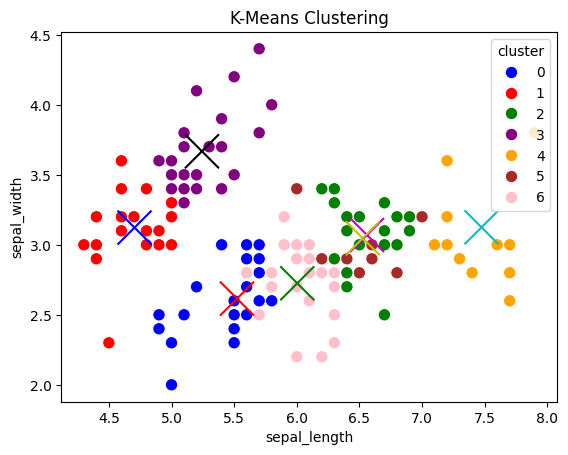

In [ ]:
#color_dict = {0: 'blue', 1: 'red', 2: 'green'} #para 3 clusters
#centroid_colors = ['r','b','m']
color_dict = {0: 'blue', 1: 'red', 2: 'green'} #para 7 clusters
centroid_colors = ['r','b','m'] # Add colors for centroids as well
sns.scatterplot(x='oscar',y= 'sepal_width', data=df,hue='cluster',palette = color_dict, s = 80)
plt.scatter(x_centroids, y_centroids, s=600, marker = 'x', c=centroid_colors)
plt.title('K-Means Clustering')
plt.show()


**Preparação do Gráfico para Mostrar os Cluster e as amostras Originais**

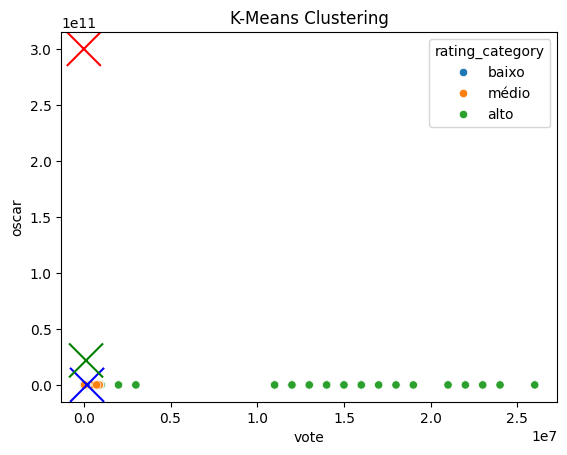

In [ ]:
color_dict = {0: 'blue', 1: 'red', 2: 'green'}
centroid_colors = ['b','r','g']
sns.scatterplot(x='vote',y= 'oscar', data=df,hue='rating_category')
plt.scatter(x_centroids, y_centroids, s=600, marker = 'x', c=centroid_colors)
plt.title('K-Means Clustering')
plt.show()